**Cole Turner and Ethan Seal**

Fall 2019

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [6]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

**Global note: Make sure any debug printouts do not appear if `verbose=False`!**

## Task 4) Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. We will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (in `optimizer.py::update_weights` in each subclass). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [7]:
from optimizer import *

####  Test SGD

In [7]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [8]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [9]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 5) Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`. Add an optional parameter `print_every=1` that controls the frequency (in iterations) with which to wait before printing out the loss and iteration number.

## Task 6) Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-style neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10. If everything is working properly, the network should overfit and you should see a significant drop in the loss from its starting value of ~2.3.

### 6a) Move your `preprocess_data.py` from the MLP project

Make the one following change:

- Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)

In [4]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 6b) Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Notes:**
- You will need to download the new version of `load_stl10_dataset`.
- The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [11]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=6)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
imgs.shape (5000, 16, 16, 3)
data.shape (5000, 768)
Train data shape:  (4548, 768)
Train labels shape:  (4548,)
Test data shape:  (400, 768)
Test labels shape:  (400,)
Validation data shape:  (2, 768)
Validation labels shape:  (2,)
dev data shape:  (50, 768)
dev labels shape:  (50,)


### 6c) Train and overfit the network on a small STL-10 sample with each optimizer

**Goal:** If your network works, you should see a drop in loss over epochs to 0.

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we dont care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

Guidelines:

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~30 mins on my laptop.

**Caveat emptor:** Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours. Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss. Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction. Consider using the Davis 102 iMacs if this is running too slow on your laptop.

In [19]:
wt_scale = 1e-2
lr = 1e-2
input_shape = (3, 16, 16)
mini_batch_sz = 10
n_epochs = 150

#preprocessing flattened it when we actually wanted it not flattened.
x_dev = x_dev.reshape(x_dev.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_val = x_val.reshape(x_val.shape[0], input_shape[0], input_shape[1], input_shape[2])


In [20]:
# Adam

adam = ConvNet4(input_shape=input_shape, wt_scale=wt_scale, verbose=False)
adam.compile('adam')
adam.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=mini_batch_sz, n_epochs=n_epochs)

Starting to train...
750 iterations. 5 iter/epoch.
Iteration: 1/750.
Time taken for iteration 0: 1.6660547256469727
Estimated time to complete: 1249.5410442352295
Iteration: 2/750.
Iteration: 3/750.
Iteration: 4/750.
Iteration: 5/750.
Iteration: 6/750.
Iteration: 7/750.
Iteration: 8/750.
Iteration: 9/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [2.2845796024885723, 2.2924845991086413, 2.2430353643670484]


-----------ACCURACIES-----------

  Train acc: 0.16, Val acc: 0.0


Iteration: 10/750.
Iteration: 11/750.
Iteration: 12/750.
Iteration: 13/750.
Iteration: 14/750.
Iteration: 15/750.
Iteration: 16/750.
Iteration: 17/750.
Iteration: 18/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [2.196307338513974, 2.1725589737331377, 1.8555820840431605]


-----------ACCURACIES-----------

  Train acc: 0.24, Val acc: 0.0


Iteration: 19/750.
Iteration: 20/750.
Iteration: 21/750.
Iteration: 2

Iteration: 183/750.
Iteration: 184/750.
Iteration: 185/750.
Iteration: 186/750.
Iteration: 187/750.
Iteration: 188/750.
Iteration: 189/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.2526039181014987, 0.2661376588799025, 0.29333143778269355]


-----------ACCURACIES-----------

  Train acc: 0.96, Val acc: 0.0


Iteration: 190/750.
Iteration: 191/750.
Iteration: 192/750.
Iteration: 193/750.
Iteration: 194/750.
Iteration: 195/750.
Iteration: 196/750.
Iteration: 197/750.
Iteration: 198/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.1112629225244871, 0.07248974144177063, 0.31392346579773295]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 199/750.
Iteration: 200/750.
Iteration: 201/750.
Iteration: 202/750.
Iteration: 203/750.
Iteration: 204/750.
Iteration: 205/750.
Iteration: 206/750.
Iteration: 207/750.

-------------LOSS HISTORIES-------------

L

Iteration: 363/750.
Iteration: 364/750.
Iteration: 365/750.
Iteration: 366/750.
Iteration: 367/750.
Iteration: 368/750.
Iteration: 369/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.016828954981043625, 0.008532854220705712, 0.014868278238738564]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 370/750.
Iteration: 371/750.
Iteration: 372/750.
Iteration: 373/750.
Iteration: 374/750.
Iteration: 375/750.
Iteration: 376/750.
Iteration: 377/750.
Iteration: 378/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.009769343830962701, 0.014373982427621002, 0.00897708285199268]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 379/750.
Iteration: 380/750.
Iteration: 381/750.
Iteration: 382/750.
Iteration: 383/750.
Iteration: 384/750.
Iteration: 385/750.
Iteration: 386/750.
Iteration: 387/750.

-------------LOSS HISTORIES---------

Iteration: 541/750.
Iteration: 542/750.
Iteration: 543/750.
Iteration: 544/750.
Iteration: 545/750.
Iteration: 546/750.
Iteration: 547/750.
Iteration: 548/750.
Iteration: 549/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.002019017040326986, 0.003892469532275133, 0.0035536293901333015]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 550/750.
Iteration: 551/750.
Iteration: 552/750.
Iteration: 553/750.
Iteration: 554/750.
Iteration: 555/750.
Iteration: 556/750.
Iteration: 557/750.
Iteration: 558/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.0033645742777648154, 0.0025017081009596756, 0.003921704589888853]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 559/750.
Iteration: 560/750.
Iteration: 561/750.
Iteration: 562/750.
Iteration: 563/750.
Iteration: 564/750.
Iteration: 565/750.
Iteration: 566/750.
Iteration: 56

  Train acc: 1.0, Val acc: 0.0


Iteration: 721/750.
Iteration: 722/750.
Iteration: 723/750.
Iteration: 724/750.
Iteration: 725/750.
Iteration: 726/750.
Iteration: 727/750.
Iteration: 728/750.
Iteration: 729/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.00160438701564368, 0.0015889317417497155, 0.0020780690656655564]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 730/750.
Iteration: 731/750.
Iteration: 732/750.
Iteration: 733/750.
Iteration: 734/750.
Iteration: 735/750.
Iteration: 736/750.
Iteration: 737/750.
Iteration: 738/750.

-------------LOSS HISTORIES-------------

Loss original: 2.3055575589923514
Loss latest three: [0.0010388349009595177, 0.0013960343425225312, 0.0021584754233142122]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 739/750.
Iteration: 740/750.
Iteration: 741/750.
Iteration: 742/750.
Iteration: 743/750.
Iteration: 744/750.
Iteration: 745/750.

In [21]:
# SGD-M
sgd_m = ConvNet4(input_shape=input_shape, wt_scale=wt_scale, verbose=False)
sgd_m.compile('sgd_momentum')
sgd_m.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=mini_batch_sz, n_epochs=n_epochs)

Starting to train...
750 iterations. 5 iter/epoch.
Iteration: 1/750.
Time taken for iteration 0: 1.6611967086791992
Estimated time to complete: 1245.8975315093994
Iteration: 2/750.
Iteration: 3/750.
Iteration: 4/750.
Iteration: 5/750.
Iteration: 6/750.
Iteration: 7/750.
Iteration: 8/750.
Iteration: 9/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.3083244218204695, 2.305725695413475, 2.297431716772699]


-----------ACCURACIES-----------

  Train acc: 0.16, Val acc: 0.0


Iteration: 10/750.
Iteration: 11/750.
Iteration: 12/750.
Iteration: 13/750.
Iteration: 14/750.
Iteration: 15/750.
Iteration: 16/750.
Iteration: 17/750.
Iteration: 18/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.3018450824131884, 2.3036695764710173, 2.3017066047698584]


-----------ACCURACIES-----------

  Train acc: 0.16, Val acc: 0.0


Iteration: 19/750.
Iteration: 20/750.
Iteration: 21/750.
Iteration: 22/7

Iteration: 185/750.
Iteration: 186/750.
Iteration: 187/750.
Iteration: 188/750.
Iteration: 189/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.2809092996558507, 2.2789688282647362, 2.28805322376837]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 190/750.
Iteration: 191/750.
Iteration: 192/750.
Iteration: 193/750.
Iteration: 194/750.
Iteration: 195/750.
Iteration: 196/750.
Iteration: 197/750.
Iteration: 198/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.2551803876097742, 2.268825191182065, 2.2279083463692317]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 199/750.
Iteration: 200/750.
Iteration: 201/750.
Iteration: 202/750.
Iteration: 203/750.
Iteration: 204/750.
Iteration: 205/750.
Iteration: 206/750.
Iteration: 207/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest thr

  Train acc: 0.22, Val acc: 0.0


Iteration: 370/750.
Iteration: 371/750.
Iteration: 372/750.
Iteration: 373/750.
Iteration: 374/750.
Iteration: 375/750.
Iteration: 376/750.
Iteration: 377/750.
Iteration: 378/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.24355648076423, 2.176654193386759, 2.343633754517829]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 379/750.
Iteration: 380/750.
Iteration: 381/750.
Iteration: 382/750.
Iteration: 383/750.
Iteration: 384/750.
Iteration: 385/750.
Iteration: 386/750.
Iteration: 387/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.258344127286521, 2.287439493420776, 2.2160262565649242]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 388/750.
Iteration: 389/750.
Iteration: 390/750.
Iteration: 391/750.
Iteration: 392/750.
Iteration: 393/750.
Iteration: 394/750.
Iteration: 395/750.


Iteration: 554/750.
Iteration: 555/750.
Iteration: 556/750.
Iteration: 557/750.
Iteration: 558/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.1614771451312933, 2.3313536288551155, 2.166155356616962]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 559/750.
Iteration: 560/750.
Iteration: 561/750.
Iteration: 562/750.
Iteration: 563/750.
Iteration: 564/750.
Iteration: 565/750.
Iteration: 566/750.
Iteration: 567/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.1527029769325354, 2.256560466136464, 2.298755900566209]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 568/750.
Iteration: 569/750.
Iteration: 570/750.
Iteration: 571/750.
Iteration: 572/750.
Iteration: 573/750.
Iteration: 574/750.
Iteration: 575/750.
Iteration: 576/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest thr

  Train acc: 0.22, Val acc: 0.0


Iteration: 739/750.
Iteration: 740/750.
Iteration: 741/750.
Iteration: 742/750.
Iteration: 743/750.
Iteration: 744/750.
Iteration: 745/750.
Iteration: 746/750.
Iteration: 747/750.

-------------LOSS HISTORIES-------------

Loss original: 2.309333752799659
Loss latest three: [2.3353460865512017, 2.3626829171958854, 2.1615144716245003]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 748/750.
Iteration: 749/750.
Iteration: 750/750.


----------------FINAL OUTPUT----------------
  Train acc: 0.22, Val acc: 0.0
Loss history: [2.309333752799659, 2.3100475210286935, 2.302734681556495, 2.303403251768486, 2.3008919111426778, 2.3030688070130423, 2.3083244218204695, 2.305725695413475, 2.297431716772699, 2.2971185583164577, 2.295047037977388, 2.3075030230866163, 2.2950493262693032, 2.302557765275875, 2.302703579304868, 2.3018450824131884, 2.3036695764710173, 2.3017066047698584, 2.3026332858630787, 2.3012372917903128, 2.305793666504

In [22]:
# SGD
sgd = ConvNet4(input_shape=input_shape, wt_scale=wt_scale, verbose=False)
sgd.compile('sgd')
sgd.fit(x_dev, y_dev, x_val, y_val, mini_batch_sz=mini_batch_sz, n_epochs=n_epochs)

Starting to train...
750 iterations. 5 iter/epoch.
Iteration: 1/750.
Time taken for iteration 0: 1.6547000408172607
Estimated time to complete: 1241.0250306129456
Iteration: 2/750.
Iteration: 3/750.
Iteration: 4/750.
Iteration: 5/750.
Iteration: 6/750.
Iteration: 7/750.
Iteration: 8/750.
Iteration: 9/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [2.2667797754626706, 2.275256568294465, 2.2556253335188514]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 10/750.
Iteration: 11/750.
Iteration: 12/750.
Iteration: 13/750.
Iteration: 14/750.
Iteration: 15/750.
Iteration: 16/750.
Iteration: 17/750.
Iteration: 18/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [2.2727310367417854, 2.204103899788421, 2.258343837284645]


-----------ACCURACIES-----------

  Train acc: 0.22, Val acc: 0.0


Iteration: 19/750.
Iteration: 20/750.
Iteration: 21/750.
Iteration: 22/75

Iteration: 185/750.
Iteration: 186/750.
Iteration: 187/750.
Iteration: 188/750.
Iteration: 189/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [1.7687937906780133, 1.5499046858392924, 1.7933401927001027]


-----------ACCURACIES-----------

  Train acc: 0.44, Val acc: 0.0


Iteration: 190/750.
Iteration: 191/750.
Iteration: 192/750.
Iteration: 193/750.
Iteration: 194/750.
Iteration: 195/750.
Iteration: 196/750.
Iteration: 197/750.
Iteration: 198/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [1.8762247744837355, 1.8434306913313045, 1.646268527799408]


-----------ACCURACIES-----------

  Train acc: 0.4, Val acc: 0.0


Iteration: 199/750.
Iteration: 200/750.
Iteration: 201/750.
Iteration: 202/750.
Iteration: 203/750.
Iteration: 204/750.
Iteration: 205/750.
Iteration: 206/750.
Iteration: 207/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest th

Iteration: 369/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.3295559392454376, 0.5024100581564189, 0.4312812816763762]


-----------ACCURACIES-----------

  Train acc: 0.92, Val acc: 0.0


Iteration: 370/750.
Iteration: 371/750.
Iteration: 372/750.
Iteration: 373/750.
Iteration: 374/750.
Iteration: 375/750.
Iteration: 376/750.
Iteration: 377/750.
Iteration: 378/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.17926499542018026, 0.08146063120636833, 0.14776578401052776]


-----------ACCURACIES-----------

  Train acc: 0.96, Val acc: 0.0


Iteration: 379/750.
Iteration: 380/750.
Iteration: 381/750.
Iteration: 382/750.
Iteration: 383/750.
Iteration: 384/750.
Iteration: 385/750.
Iteration: 386/750.
Iteration: 387/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.12690574396394314, 0.14626360697760457, 0.27095333847671027]


----

  Train acc: 1.0, Val acc: 0.0


Iteration: 550/750.
Iteration: 551/750.
Iteration: 552/750.
Iteration: 553/750.
Iteration: 554/750.
Iteration: 555/750.
Iteration: 556/750.
Iteration: 557/750.
Iteration: 558/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.023462035444168056, 0.0072876130475124055, 0.007217936771467708]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 559/750.
Iteration: 560/750.
Iteration: 561/750.
Iteration: 562/750.
Iteration: 563/750.
Iteration: 564/750.
Iteration: 565/750.
Iteration: 566/750.
Iteration: 567/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.011486809869905357, 0.014080469611488039, 0.006042325705134973]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 568/750.
Iteration: 569/750.
Iteration: 570/750.
Iteration: 571/750.
Iteration: 572/750.
Iteration: 573/750.
Iteration: 574/750.
Iter

  Train acc: 1.0, Val acc: 0.0


Iteration: 730/750.
Iteration: 731/750.
Iteration: 732/750.
Iteration: 733/750.
Iteration: 734/750.
Iteration: 735/750.
Iteration: 736/750.
Iteration: 737/750.
Iteration: 738/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.005925159649311415, 0.005571045170012228, 0.002954864165883129]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 739/750.
Iteration: 740/750.
Iteration: 741/750.
Iteration: 742/750.
Iteration: 743/750.
Iteration: 744/750.
Iteration: 745/750.
Iteration: 746/750.
Iteration: 747/750.

-------------LOSS HISTORIES-------------

Loss original: 2.304373733952622
Loss latest three: [0.00718462533908763, 0.004472624064811412, 0.005578008915382949]


-----------ACCURACIES-----------

  Train acc: 1.0, Val acc: 0.0


Iteration: 748/750.
Iteration: 749/750.
Iteration: 750/750.


----------------FINAL OUTPUT----------------
  Train acc: 1.0, Val acc: 0.0
Loss his

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic?

Answer: Decreasing the mini-batch size makes the loss print-outs more erratic because there are fewer samples that have been able to propagate back through the network, so each sample has much more of an impact on what the loss value will be. There is an averaging over all samples that takes place, so if all of the samples in a very small mini-batch are predicted successfully, loss will be low, but it will be high if it performs poorly on the mini-batch. The smaller the mini-batch, the greater the chance that there is a skewed distribution of correct and incorrect predictions.

### 6d) Evaluate the different optimizers

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

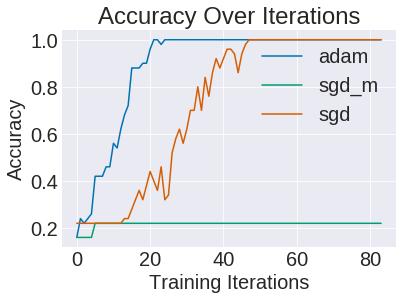

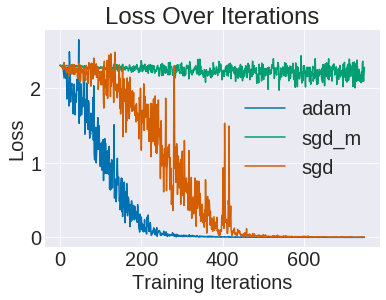

In [26]:
#get accuracy values
adam_acc = adam.train_acc_history
sgd_m_acc = sgd_m.train_acc_history
sgd_acc = sgd.train_acc_history

#plot
plt.plot(adam_acc, label="adam")
plt.plot(sgd_m_acc, label="sgd_m")
plt.plot(sgd_acc, label="sgd")

#make words show up
plt.legend()
plt.title("Accuracy Over Iterations")
plt.ylabel("Accuracy")
plt.xlabel("Training Iterations")
plt.show()

#get loss values
adam_loss = adam.loss_history
sgd_m_loss = sgd_m.loss_history
sgd_loss = sgd.loss_history

#plot
plt.plot(adam_loss, label="adam")
plt.plot(sgd_m_loss, label="sgd_m")
plt.plot(sgd_loss, label="sgd")

#make words show up
plt.legend()
plt.title("Loss Over Iterations")
plt.ylabel("Loss")
plt.xlabel("Training Iterations")
plt.show()

**Question 4**: Which optimizer works best and why do think it is best?

The adam optimizer works the best. It does so because it dynamically updates learning rate.

**Question 5**: What is happening with the training set accuracy and why?

The training set accuracy is overfitting. It is basically memorizing the features about each image, or memorizing the dataset. Therefore, it has perfect accuracy while looking at its own training set, but once it has a non-training image, it has horrible accuracy.

## Task 7: Training convolutional neural network on STL-10

### 7a) Load in STL-10 at 32x32 resolution

In [100]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=3)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
imgs.shape (5000, 32, 32, 3)
data.shape (5000, 3072)
Train data shape:  (4548, 3072)
Train labels shape:  (4548,)
Test data shape:  (400, 3072)
Test labels shape:  (400,)
Validation data shape:  (2, 3072)
Validation labels shape:  (2,)
dev data shape:  (50, 3072)
dev labels shape:  (50,)


### 7b) Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=50) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data!?

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPool2D` layers with `Conv2DAccel` and `MaxPool2DAccel`.

### 7c) Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

Notes:

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [101]:
from network import ConvNet4Accel

In [104]:
input_shape=(3,32,32)
x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_dev = x_dev.reshape(x_dev.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_val = x_val.reshape(x_val.shape[0], input_shape[0], input_shape[1], input_shape[2])
stl_imgs = stl_imgs.reshape(stl_imgs.shape[0], input_shape[0], input_shape[1], input_shape[2])
data = x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev
print(x_train.shape)
net = ConvNet4Accel(input_shape=(3, 32, 32), dense_interior_units=(200,), n_kers=(64,))
net.compile('adam')
print(stl_imgs.shape)
net.fit(x_train, y_train, x_dev, y_dev, n_epochs=20)

(4548, 3, 32, 32)
(5000, 3, 32, 32)
Starting to train...
900 iterations. 45 iter/epoch.
Iteration: 1/900.
Time taken for iteration 0: 1.0902049541473389
Estimated time to complete: 981.184458732605
Iteration: 2/900.
Iteration: 3/900.
Iteration: 4/900.
Iteration: 5/900.
Iteration: 6/900.
Iteration: 7/900.
Iteration: 8/900.
Iteration: 9/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [2.3023472197184054, 2.3015962716512393, 2.300246923982207]


-----------ACCURACIES-----------

  Train acc: 0.074, Val acc: 0.06


Iteration: 10/900.
Iteration: 11/900.
Iteration: 12/900.
Iteration: 13/900.
Iteration: 14/900.
Iteration: 15/900.
Iteration: 16/900.
Iteration: 17/900.
Iteration: 18/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [2.2834916877801397, 2.181072621319521, 2.224486294256639]


-----------ACCURACIES-----------

  Train acc: 0.156, Val acc: 0.08


Iteration: 19/900.
Iteration: 20/9

Iteration: 181/900.
Iteration: 182/900.
Iteration: 183/900.
Iteration: 184/900.
Iteration: 185/900.
Iteration: 186/900.
Iteration: 187/900.
Iteration: 188/900.
Iteration: 189/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.7051477870750826, 1.8761990151570134, 1.7652035265293575]


-----------ACCURACIES-----------

  Train acc: 0.348, Val acc: 0.24


Iteration: 190/900.
Iteration: 191/900.
Iteration: 192/900.
Iteration: 193/900.
Iteration: 194/900.
Iteration: 195/900.
Iteration: 196/900.
Iteration: 197/900.
Iteration: 198/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.596278011137305, 1.701009728017043, 1.7749903674027605]


-----------ACCURACIES-----------

  Train acc: 0.35, Val acc: 0.24


Iteration: 199/900.
Iteration: 200/900.
Iteration: 201/900.
Iteration: 202/900.
Iteration: 203/900.
Iteration: 204/900.
Iteration: 205/900.
Iteration: 206/900.
Iteration: 207/900.

------

Iteration: 364/900.
Iteration: 365/900.
Iteration: 366/900.
Iteration: 367/900.
Iteration: 368/900.
Iteration: 369/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.2925865972131236, 1.3304528074219732, 1.4809099371126546]


-----------ACCURACIES-----------

  Train acc: 0.466, Val acc: 0.32


Iteration: 370/900.
Iteration: 371/900.
Iteration: 372/900.
Iteration: 373/900.
Iteration: 374/900.
Iteration: 375/900.
Iteration: 376/900.
Iteration: 377/900.
Iteration: 378/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.3534188997492365, 1.3778564376045375, 1.2517561666574692]


-----------ACCURACIES-----------

  Train acc: 0.458, Val acc: 0.32


Iteration: 379/900.
Iteration: 380/900.
Iteration: 381/900.
Iteration: 382/900.
Iteration: 383/900.
Iteration: 384/900.
Iteration: 385/900.
Iteration: 386/900.
Iteration: 387/900.

-------------LOSS HISTORIES-------------

Loss original: 2.3025

Iteration: 547/900.
Iteration: 548/900.
Iteration: 549/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.1558656507032627, 1.1536955239028732, 1.023166848370361]


-----------ACCURACIES-----------

  Train acc: 0.564, Val acc: 0.4


Iteration: 550/900.
Iteration: 551/900.
Iteration: 552/900.
Iteration: 553/900.
Iteration: 554/900.
Iteration: 555/900.
Iteration: 556/900.
Iteration: 557/900.
Iteration: 558/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.1194185394009046, 1.1182215689189423, 1.1221497244198948]


-----------ACCURACIES-----------

  Train acc: 0.556, Val acc: 0.3


Iteration: 559/900.
Iteration: 560/900.
Iteration: 561/900.
Iteration: 562/900.
Iteration: 563/900.
Iteration: 564/900.
Iteration: 565/900.
Iteration: 566/900.
Iteration: 567/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [1.3421256013293024, 1.152313407

  Train acc: 0.694, Val acc: 0.4


Iteration: 730/900.
Iteration: 731/900.
Iteration: 732/900.
Iteration: 733/900.
Iteration: 734/900.
Iteration: 735/900.
Iteration: 736/900.
Iteration: 737/900.
Iteration: 738/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [0.8046187931309772, 0.8446359894922004, 0.6552574557247701]


-----------ACCURACIES-----------

  Train acc: 0.714, Val acc: 0.36


Iteration: 739/900.
Iteration: 740/900.
Iteration: 741/900.
Iteration: 742/900.
Iteration: 743/900.
Iteration: 744/900.
Iteration: 745/900.
Iteration: 746/900.
Iteration: 747/900.

-------------LOSS HISTORIES-------------

Loss original: 2.302553937969369
Loss latest three: [0.7303700834098155, 0.6830172944475912, 0.7082018369173037]


-----------ACCURACIES-----------

  Train acc: 0.778, Val acc: 0.32


Iteration: 748/900.
Iteration: 749/900.
Iteration: 750/900.
Iteration: 751/900.
Iteration: 752/900.
Iteration: 753/900.
Iteration: 754/900.
Iteration

In [105]:
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
print(net.accuracy(x_test,y_test))

0.435


In [94]:

x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
print(net.accuracy(x_test,y_test))

0.475


### 7d) Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

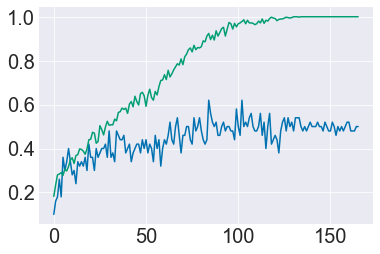

In [95]:
plt.plot(net.validation_acc_history)
plt.plot(net.train_acc_history)
plt.show()

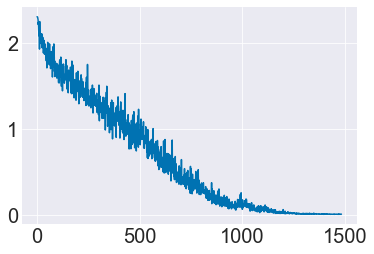

In [96]:
plt.plot(net.loss_history)
plt.show()

### 7f) Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [106]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

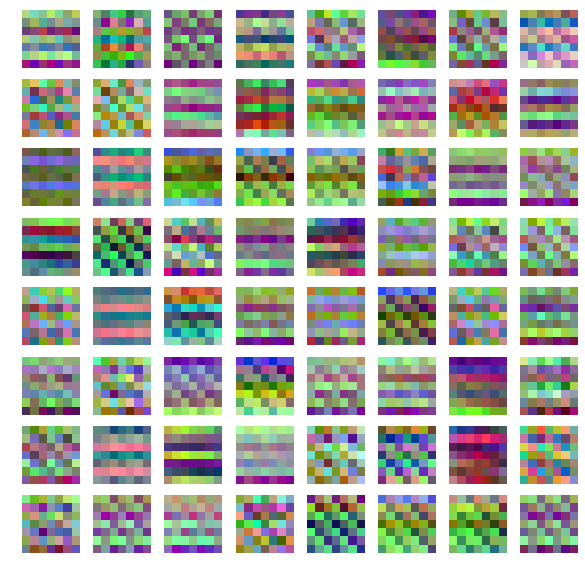

In [107]:
# Subsitute your trained network below
# netT is my network's name
# You shouldn't see RGB noise
plot_weights(net.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

Note: you should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

###  3. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 4. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 5. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 6. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 7. Additional datasets

Do classification and analyxe the results with an image dataset of your choice.

### 8. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.

In [77]:
# RMSprop
rms = ConvNet4Accel(input_shape=input_shape, verbose=False)
rms.compile('rmsprop')
rms.fit(x_train,y_train, x_dev, y_dev, n_epochs=33)

Starting to train...
1485 iterations. 45 iter/epoch.
Iteration: 1/1485.
Time taken for iteration 0: 0.4887669086456299
Estimated time to complete: 725.8188593387604
Iteration: 2/1485.
Iteration: 3/1485.
Iteration: 4/1485.
Iteration: 5/1485.
Iteration: 6/1485.
Iteration: 7/1485.
Iteration: 8/1485.
Iteration: 9/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [2.301873147133011, 2.2500227794087517, 2.2528956186527007]


-----------ACCURACIES-----------

  Train acc: 0.182, Val acc: 0.1


Iteration: 10/1485.
Iteration: 11/1485.
Iteration: 12/1485.
Iteration: 13/1485.
Iteration: 14/1485.
Iteration: 15/1485.
Iteration: 16/1485.
Iteration: 17/1485.
Iteration: 18/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [2.230990432879249, 2.1149906439690698, 2.1096766136833516]


-----------ACCURACIES-----------

  Train acc: 0.194, Val acc: 0.3


Iteration: 19/1485.
Iteration: 20/1485.
Iteration

  Train acc: 0.368, Val acc: 0.46


Iteration: 181/1485.
Iteration: 182/1485.
Iteration: 183/1485.
Iteration: 184/1485.
Iteration: 185/1485.
Iteration: 186/1485.
Iteration: 187/1485.
Iteration: 188/1485.
Iteration: 189/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.6117549748955529, 1.680272052141252, 1.7998692957003273]


-----------ACCURACIES-----------

  Train acc: 0.362, Val acc: 0.32


Iteration: 190/1485.
Iteration: 191/1485.
Iteration: 192/1485.
Iteration: 193/1485.
Iteration: 194/1485.
Iteration: 195/1485.
Iteration: 196/1485.
Iteration: 197/1485.
Iteration: 198/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.6398577725723087, 1.663734883061584, 1.7210220349441085]


-----------ACCURACIES-----------

  Train acc: 0.322, Val acc: 0.42


Iteration: 199/1485.
Iteration: 200/1485.
Iteration: 201/1485.
Iteration: 202/1485.
Iteration: 203/1485.
Iteration: 204/1485.
Iter

  Train acc: 0.46, Val acc: 0.46


Iteration: 361/1485.
Iteration: 362/1485.
Iteration: 363/1485.
Iteration: 364/1485.
Iteration: 365/1485.
Iteration: 366/1485.
Iteration: 367/1485.
Iteration: 368/1485.
Iteration: 369/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.4999388183856286, 1.5809875596776781, 1.410948735368885]


-----------ACCURACIES-----------

  Train acc: 0.468, Val acc: 0.36


Iteration: 370/1485.
Iteration: 371/1485.
Iteration: 372/1485.
Iteration: 373/1485.
Iteration: 374/1485.
Iteration: 375/1485.
Iteration: 376/1485.
Iteration: 377/1485.
Iteration: 378/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.4512285850198103, 1.4407832884959033, 1.4338142023473937]


-----------ACCURACIES-----------

  Train acc: 0.484, Val acc: 0.4


Iteration: 379/1485.
Iteration: 380/1485.
Iteration: 381/1485.
Iteration: 382/1485.
Iteration: 383/1485.
Iteration: 384/1485.
Itera

  Train acc: 0.532, Val acc: 0.44


Iteration: 541/1485.
Iteration: 542/1485.
Iteration: 543/1485.
Iteration: 544/1485.
Iteration: 545/1485.
Iteration: 546/1485.
Iteration: 547/1485.
Iteration: 548/1485.
Iteration: 549/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.4236339142765377, 1.3395100701188287, 1.4078794144346116]


-----------ACCURACIES-----------

  Train acc: 0.516, Val acc: 0.32


Iteration: 550/1485.
Iteration: 551/1485.
Iteration: 552/1485.
Iteration: 553/1485.
Iteration: 554/1485.
Iteration: 555/1485.
Iteration: 556/1485.
Iteration: 557/1485.
Iteration: 558/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.2561255224883734, 1.3292067876299836, 1.3030672708757445]


-----------ACCURACIES-----------

  Train acc: 0.506, Val acc: 0.48


Iteration: 559/1485.
Iteration: 560/1485.
Iteration: 561/1485.
Iteration: 562/1485.
Iteration: 563/1485.
Iteration: 564/1485.
It

  Train acc: 0.596, Val acc: 0.4


Iteration: 721/1485.
Iteration: 722/1485.
Iteration: 723/1485.
Iteration: 724/1485.
Iteration: 725/1485.
Iteration: 726/1485.
Iteration: 727/1485.
Iteration: 728/1485.
Iteration: 729/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.1514198520905663, 1.282891466047233, 1.2270859749783023]


-----------ACCURACIES-----------

  Train acc: 0.578, Val acc: 0.44


Iteration: 730/1485.
Iteration: 731/1485.
Iteration: 732/1485.
Iteration: 733/1485.
Iteration: 734/1485.
Iteration: 735/1485.
Iteration: 736/1485.
Iteration: 737/1485.
Iteration: 738/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [1.0930238402413017, 0.9062983219563698, 1.0320299024209445]


-----------ACCURACIES-----------

  Train acc: 0.562, Val acc: 0.48


Iteration: 739/1485.
Iteration: 740/1485.
Iteration: 741/1485.
Iteration: 742/1485.
Iteration: 743/1485.
Iteration: 744/1485.
Iter

  Train acc: 0.658, Val acc: 0.38


Iteration: 901/1485.
Iteration: 902/1485.
Iteration: 903/1485.
Iteration: 904/1485.
Iteration: 905/1485.
Iteration: 906/1485.
Iteration: 907/1485.
Iteration: 908/1485.
Iteration: 909/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.8427859543136914, 0.942160493663663, 0.9567560222790195]


-----------ACCURACIES-----------

  Train acc: 0.642, Val acc: 0.4


Iteration: 910/1485.
Iteration: 911/1485.
Iteration: 912/1485.
Iteration: 913/1485.
Iteration: 914/1485.
Iteration: 915/1485.
Iteration: 916/1485.
Iteration: 917/1485.
Iteration: 918/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.9418253904827638, 0.9093623970922358, 0.8483660994376551]


-----------ACCURACIES-----------

  Train acc: 0.654, Val acc: 0.42


Iteration: 919/1485.
Iteration: 920/1485.
Iteration: 921/1485.
Iteration: 922/1485.
Iteration: 923/1485.
Iteration: 924/1485.
Iter

Iteration: 1080/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.7618266713276903, 0.6544097563019945, 0.6942676964617512]


-----------ACCURACIES-----------

  Train acc: 0.758, Val acc: 0.46


Iteration: 1081/1485.
Iteration: 1082/1485.
Iteration: 1083/1485.
Iteration: 1084/1485.
Iteration: 1085/1485.
Iteration: 1086/1485.
Iteration: 1087/1485.
Iteration: 1088/1485.
Iteration: 1089/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.8399014777650902, 0.7735057554807135, 0.7409869177520839]


-----------ACCURACIES-----------

  Train acc: 0.72, Val acc: 0.46


Iteration: 1090/1485.
Iteration: 1091/1485.
Iteration: 1092/1485.
Iteration: 1093/1485.
Iteration: 1094/1485.
Iteration: 1095/1485.
Iteration: 1096/1485.
Iteration: 1097/1485.
Iteration: 1098/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.8304020598200471, 0.991315

  Train acc: 0.708, Val acc: 0.38


Iteration: 1252/1485.
Iteration: 1253/1485.
Iteration: 1254/1485.
Iteration: 1255/1485.
Iteration: 1256/1485.
Iteration: 1257/1485.
Iteration: 1258/1485.
Iteration: 1259/1485.
Iteration: 1260/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.5175385932679349, 0.5081483352699074, 0.5447556507061871]


-----------ACCURACIES-----------

  Train acc: 0.808, Val acc: 0.38


Iteration: 1261/1485.
Iteration: 1262/1485.
Iteration: 1263/1485.
Iteration: 1264/1485.
Iteration: 1265/1485.
Iteration: 1266/1485.
Iteration: 1267/1485.
Iteration: 1268/1485.
Iteration: 1269/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.5089409524188038, 0.6254075863815982, 0.5875134817913333]


-----------ACCURACIES-----------

  Train acc: 0.802, Val acc: 0.36


Iteration: 1270/1485.
Iteration: 1271/1485.
Iteration: 1272/1485.
Iteration: 1273/1485.
Iteration: 1274/1485.


Iteration: 1426/1485.
Iteration: 1427/1485.
Iteration: 1428/1485.
Iteration: 1429/1485.
Iteration: 1430/1485.
Iteration: 1431/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.48276099649321697, 0.3527491098812574, 0.41736246153234535]


-----------ACCURACIES-----------

  Train acc: 0.808, Val acc: 0.38


Iteration: 1432/1485.
Iteration: 1433/1485.
Iteration: 1434/1485.
Iteration: 1435/1485.
Iteration: 1436/1485.
Iteration: 1437/1485.
Iteration: 1438/1485.
Iteration: 1439/1485.
Iteration: 1440/1485.

-------------LOSS HISTORIES-------------

Loss original: 2.3024789886306367
Loss latest three: [0.3348515160734279, 0.4061479869006761, 0.41179483405976414]


-----------ACCURACIES-----------

  Train acc: 0.884, Val acc: 0.5


Iteration: 1441/1485.
Iteration: 1442/1485.
Iteration: 1443/1485.
Iteration: 1444/1485.
Iteration: 1445/1485.
Iteration: 1446/1485.
Iteration: 1447/1485.
Iteration: 1448/1485.
Iteration: 1449/1485.

-----------

In [78]:
rms.accuracy(x_test,y_test)

0.405

**Analysis of RMSProp**
To preface this analysis, it must be stated we used this article as a starting point for the implementation of RMSProp: https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a.

We predicted that RMSProp is comparable to Adam in performance. RMSProp is an extension of RProp, which makes a weight by weight comparison of the weight gradient and if the signs are the same it increases learning rate, and if they are different, it decreases. This is because if the sign of the gradient is the same for two updates in a row, it is going in the right direction, so it can speed up its descent of the loss space. If the signs are different, that means that it went too far in loss space, so it should decrease the adjustment to the weight for the next update.

RProp is good for training when the batch size is the entire epoch, but fails when there are mini-batches because it has to divide by different gradients each time. RMSProp extends on the idea of RProp by eliminating the problem of mini-batches. It solves this problem by introducing the root of the square of the gradients (root mean square -> RMS), which is a moving average of the gradient. The moving average solves the problem of a gradient that changes erratically because the gradient that we actually use in the equation no longer changes erratically. Additionally, the beta parameter helps solve this problem by weighting the influence that previous gradients have on the new gradient.

We created a ConvNet4Accel network using RMSProp and the full dataset run as we used on Adam in part 7. Using these two runs, we can build a comparison of the two optimizers. 

Time: From a time-per-iteration perspective, RMSProp takes about .489 seconds and a total of 726 seconds to complete for 1485 iterations. Adam takes .522 seconds per iteration and a total of 775 seconds to run. If these were running for longer, that time difference would be even larger. Therefore, the smaller amount of computation in RMSProp makes it a more efficient algorithm to run. 

Accuracy: Our Adam optimizer scores a higher accuracy. We can see there is a 40.5% accuracy compared to a 42.5% accuracy when the models are both run for 33 epochs on default parameters. So, if accuracy matters less and there is only so long to train, then RMSProp is the optimizer to use. It would be curious to see if there would be an improvement if they were trained on a time basis rather than an epochs basis. If given the same amount of time, does RMSProp do better rather than Adam?

Below are some graphs that plot the loss of RMSProp and Adam.

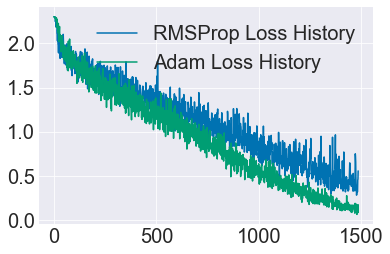

In [88]:
plt.plot(rms.loss_history, label="RMSProp Loss History")
plt.plot(net.loss_history, label="Adam Loss History")
plt.legend()
plt.show()

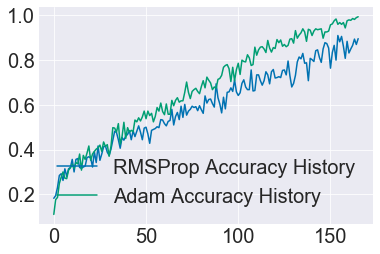

In [89]:
plt.plot(rms.train_acc_history, label="RMSProp Accuracy History")
plt.plot(net.train_acc_history, label="Adam Accuracy History")
plt.legend()
plt.show()

In the graphs above, Blue is RMSProp, Green is Adam. It is clear the Adam is more performant in the epochs. Both Loss and Accuracy from training were worse in RMSProp than Adam. If we had to choose one, we would take Adam, even though we found RMSProp to be faster.

We chose to do this extension because we have seen RMSProp in other classes and documentation. We saw it in class and in Keras documentation as well as Medium articles so we decided we wanted to understand what it was. Now we know! :)